<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# K-Nearest Neighbours Classification

## 1. Defining the Question

### a) Specifying the Data Analytic Question

You are tasked to complete the analysis of what sorts of people were likely to survive the titanic. 
Specifically you are requested to apply K-Nearest Neighbours modelling 
to predict which passengers survived the tragedy.

### b) Defining the Metric for Success

This project will be considered successful once we build a model that gives an accuracy score of above 80%

### c) Understanding the context 

Titanic, in full Royal Mail Ship (RMS) Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.



### d) Recording the Experimental Design

The Experimental design will include:

* Perform your EDA
* Perform any necessary feature engineering
* Check of multicollinearity
* K-Nearest Neighbours
* Use different test sizes(20%, 30% & 40%)
* Compute accuracy score
* Compute MSE score
* Compute Confusion matrix score

### e) Data Relevance

The dataset provided is relevant to this project

## 2. Reading the Data

In [60]:
## importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# accuracy libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [131]:
# Loading the Data from the source i.e. csv
# ---
titanic = pd.read_csv('train.csv')



## 3. Checking the Data

In [78]:
# Determining the no. of records in our dataset
#
print(titanic.shape)

(891, 12)


In [79]:
# Previewing the top of our dataset
#
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Previewing the bottom of our dataset
# 
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [81]:
# Checking whether each column has an appropriate datatype
#
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [82]:
# Checking the central tendencies of the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

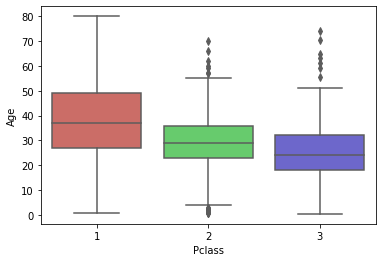

In [19]:
# Checking for Outliers
#
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')

Speaking roughly, we could say that the younger a passenger is, the more likely it is for them to be in 3rd class.

The older a passenger is, the more likely it is for them to be in 1st class. 
So there is a loose relationship between these variables. 

So, let's write a function that approximates a passengers age, based on their class. 

From the box plot, it looks like the average age of 1st class passengers 
is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

In [20]:
# Checking for Anomalies
#
Q1T = titanic.quantile(0.25)
Q3T = titanic.quantile(0.75)
IQR_T = Q3T - Q1T
print(IQR_T)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [21]:
# Identifying the Missing Data
#
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# Dealing with the Missing Data
#
def titanic_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

titanic['Age'] = titanic[['Age', 'Pclass']].apply(titanic_age, axis=1)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
# dropping unnecessary columns
titanic_df = titanic.drop('Cabin',1)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [29]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [31]:
# More data cleaning procedures
#
titanic_df.duplicated().any()

False

In [35]:
titanic_outliers = (titanic_df < (Q1T - 1.5 * IQR_T)) | (titanic_df > (Q3T + 1.5 * IQR_T))
print(titanic_outliers.any())

Age             True
Embarked       False
Fare            True
Name           False
Parch           True
PassengerId    False
Pclass         False
Sex            False
SibSp           True
Survived       False
Ticket         False
dtype: bool


In [47]:
titanic1 = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'],drop_first=True)
titanic1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


## 6. Exploratory Analysis

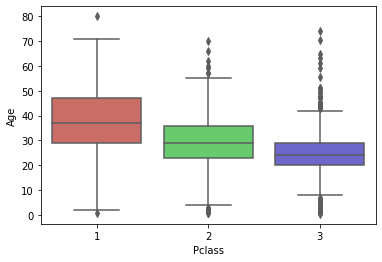

In [132]:
# Ploting the bivariate summaries and recording our observations
#
sns.boxplot(x='Pclass', y='Age', data=titanic1, palette='hls')

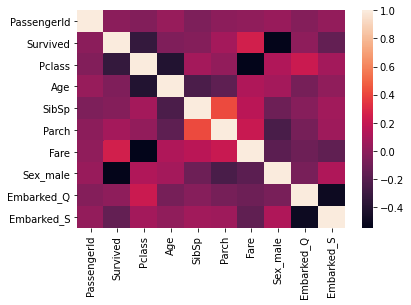

In [48]:
sns.heatmap(titanic1.corr())

Fare and Pclass are not independent of each other, so I am going to drop these.

## 7. Implementing the Solution

In [84]:
# Implementing the Solution
# 
X = titanic1.drop(columns=['Survived','Name','Fare', 'PassengerId','Pclass' ,'Ticket'],axis=1)
y = titanic1["Survived"]


**20% testing sample**

In [139]:
# Splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fitting the model 
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [140]:
y_pred = classifier.predict(X_test)
print('MSE:',mean_squared_error(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))

MSE: 0.20224719101123595
Accuracy score: 0.797752808988764
Confusion matrix
[[93 15]
 [21 49]]


**30% testing sample**

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [142]:
y_pred = classifier.predict(X_test)
print('MSE:',mean_squared_error(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))

MSE: 0.18726591760299627
Accuracy score: 0.8127340823970037
Confusion matrix
[[143  21]
 [ 29  74]]


**40% testing sample**

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=25)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [144]:
y_pred = classifier.predict(X_test)
print('MSE:',mean_squared_error(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))

MSE: 0.1797752808988764
Accuracy score: 0.8202247191011236
Confusion matrix
[[187  25]
 [ 39 105]]


## 8. Challenging the solution

> As we have seen in the solution, the more the testing data, the higher the accuracy.

> Maybe with some boosting the model can achieve better results






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

yes

### c). Did we have the right question?

yes